In [415]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.font_manager as fm

import statsmodels as sm

import seaborn as sns

In [416]:
font_path = '../extra/Cinzel-VariableFont_wght.ttf'

cinzel_font = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)

In [417]:
RED = '#6F1D1B'
RICH_BLACK = '#011627'

In [418]:
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "serif",
#     "font.serif": ["Computer Modern Roman"],
#     "axes.grid" : True,
#     "grid.color" : "#8D99AE",
#     # "font.size": 20,
# })

In [419]:
def decorate_acf(ax, loc):
    SIZE_TICKS = 24

    # Eliminate upper and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    # Show ticks in the left and lower axes only
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    # Adjust the font size of the tick labels
    ax.tick_params(axis='both', which='major', labelsize=SIZE_TICKS)

    if loc:
        plt.legend(fontsize=10, loc=loc)

    # Update font settings
    plt.rcParams.update({
        "font.family": cinzel_font.get_name(), 
        "font.size": 24
    })

    # Adjust layout
    plt.tight_layout()

<h2> <center> Wine Australia </center> </h2>

In [420]:
wine_df = pd.read_csv('../data/AusWineSales.csv')
wine_df

,YearMonth,Red,Sparkling,Sweetwhite
0,1980-01,464,1686,85
1,1980-02,675,1591,89
2,1980-03,703,2304,109
3,1980-04,887,1712,95
4,1980-05,1139,1471,91
...,...,...,...,...
182,1995-03,2459,1897,188
183,1995-04,2618,1862,195
184,1995-05,2585,1670,189
185,1995-06,3310,1688,220


In [421]:
wine_df = wine_df[['YearMonth', 'Red']].copy()
wine_df['YearMonth'] = pd.to_datetime(wine_df['YearMonth'], format='%Y-%m')

wine_df.sort_values('YearMonth', inplace=True)
wine_df

,YearMonth,Red
0,1980-01-01,464
1,1980-02-01,675
2,1980-03-01,703
3,1980-04-01,887
4,1980-05-01,1139
...,...,...
182,1995-03-01,2459
183,1995-04-01,2618
184,1995-05-01,2585
185,1995-06-01,3310


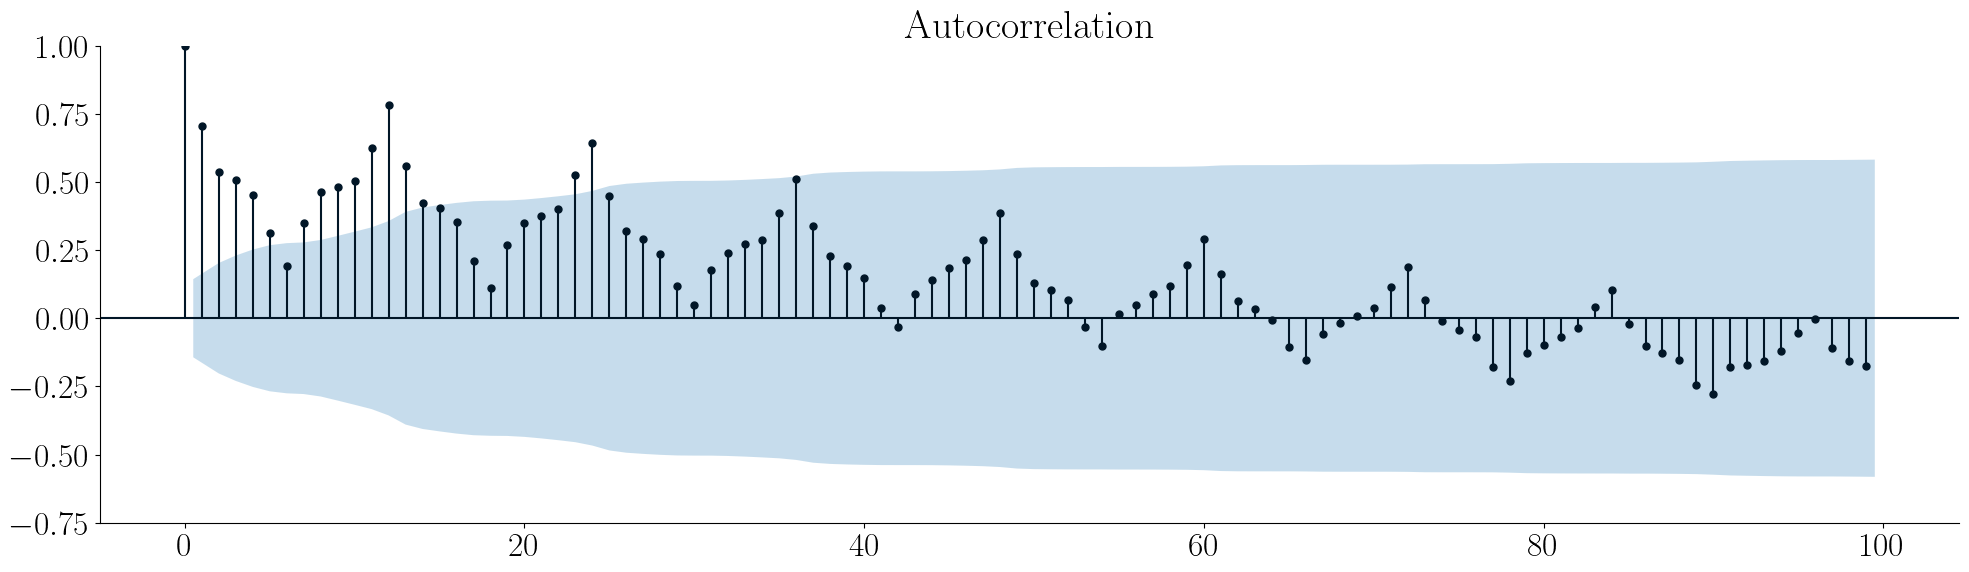

In [ ]:
_, ax = plt.subplots(figsize=(20, 6))

decorate_acf(ax, '')

sm.graphics.tsaplots.plot_acf(wine_df['Red'], 
                              lags=np.arange(0, 100, 1), 
                              ax=ax, 
                              color=RICH_BLACK, 
                              vlines_kwargs={'colors': RICH_BLACK, 
                                             'linewidth': 1.5});

ax.set_ylim(-0.75, 1)
ax.grid(False)

# plt.savefig(f'../images/acf_wine.png', dpi=300, transparent=True)